# Introdução

A pesquisa científica é essencial para a construção do conhecimento e tomada de decisões baseadas em evidências. Em ciência de dados, a aplicação de metodologias científicas permite garantir a qualidade da análise e a confiabilidade dos resultados.


# Tipos de Pesquisas

Existem cinto tipos de pesquisa em ciência de dados: as pesquisas quantitativas, as pesquisas qualitativas, as pesquisas exploratórias, as pesquisas descritivas e as pesquisas explicativas.

* Quantitativa: Baseia-se na coleta e análise de dados numéricos, utilizando estatísticas para interpretar os resultados

* Qualitativa: Foca na interpretação subjetiva dos dados, analisando aspectos como opiniões, sentimentos e comportamentos

* Exploratória: Busca entender um problema de forma inicial, sem hipóteses definidas

* Descritiva: Tem como objetivo descrever características de um fenômeno ou população

* Explicativa: Investiga relações de causa e efeito entre variáveis



# Método Indutivo vs. Método Dedutivo

* Indutivo: Parte de observações específicas para formular teorias gerais

* Dedutivo: Baseia-se em teorias gerais para explicar casos específicos



# Etapas do Método Científico

* 1- Definição do Problema: Identificação clara do que será investigado
* 2- Revisão Bibliográfica: Pesquisa sobre o que já foi estudado sobre o tema
* 3- Formulação de Hipóteses: Estabelecimento de possíveis explicações ou previsões
* 4- Coleta e Análise de Dados: Utilização de técnicas apropriadas para reunir e processar informações
* 5- Interpretação e Conclusão: Avaliação dos resultados para confirmar ou refutar as hipóteses

# Métodos estatísticos e ferramentas para pesquisa

* Técnicas de amostragem: métodos para selecionar subconjuntos representativos de uma poppulação
* Coleta de Dados: Uso de questionários, experimentos ou bases de dados públicas
* Análise Exploratória de Dados (EDA): Investigação inicial dos dados para identificar padrões e inconsistências

# Análise Prática

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


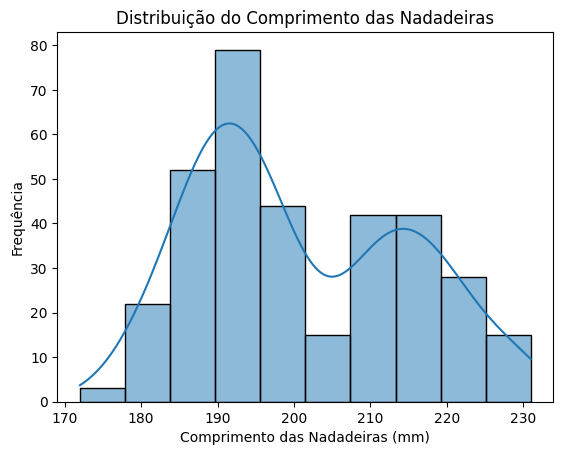

In [6]:
sns.histplot(df["flipper_length_mm"].dropna(), kde=True)
plt.title("Distribuição do Comprimento das Nadadeiras")
plt.xlabel("Comprimento das Nadadeiras (mm)")
plt.ylabel("Frequência")
plt.show()

In [7]:
correlation, p_value = stats.pearsonr(df.dropna()["flipper_length_mm"], df.dropna()["body_mass_g"])
print(f"Correlação: {correlation:.2f}, Valor-p: {p_value:.4f}")

Correlação: 0.87, Valor-p: 0.0000


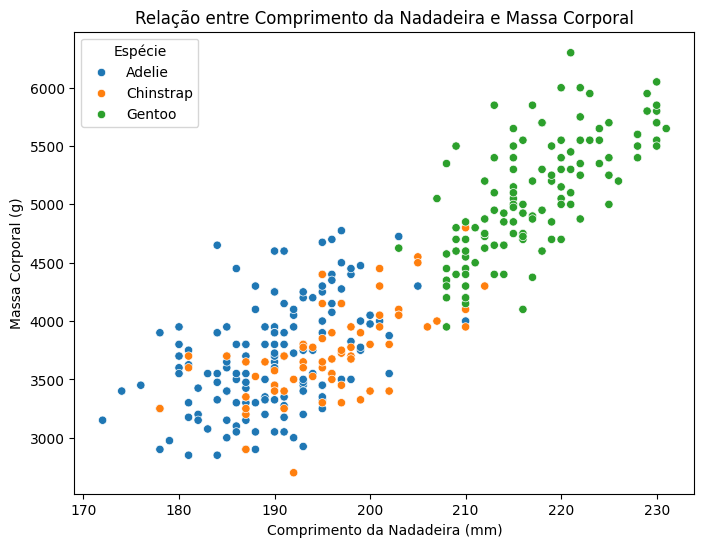

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", hue="species", data=df)
plt.title("Relação entre Comprimento da Nadadeira e Massa Corporal")
plt.xlabel("Comprimento da Nadadeira (mm)")
plt.ylabel("Massa Corporal (g)")
plt.legend(title="Espécie")
plt.show()

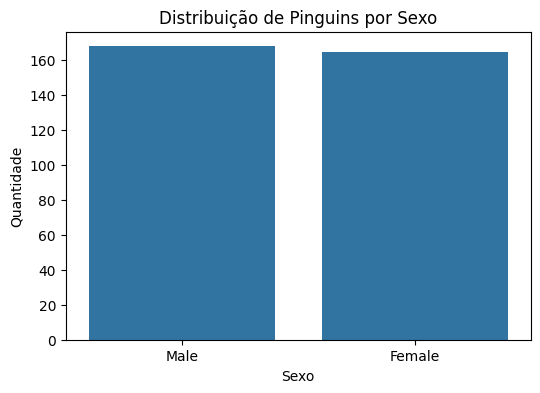

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x="sex", data=df)
plt.title("Distribuição de Pinguins por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Quantidade")
plt.show()

In [14]:
data = df[["flipper_length_mm", "body_mass_g"]].dropna()

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = pd.Series(dtype='int')
df.loc[data.index, "cluster"] = kmeans.fit_predict(data_scaled)

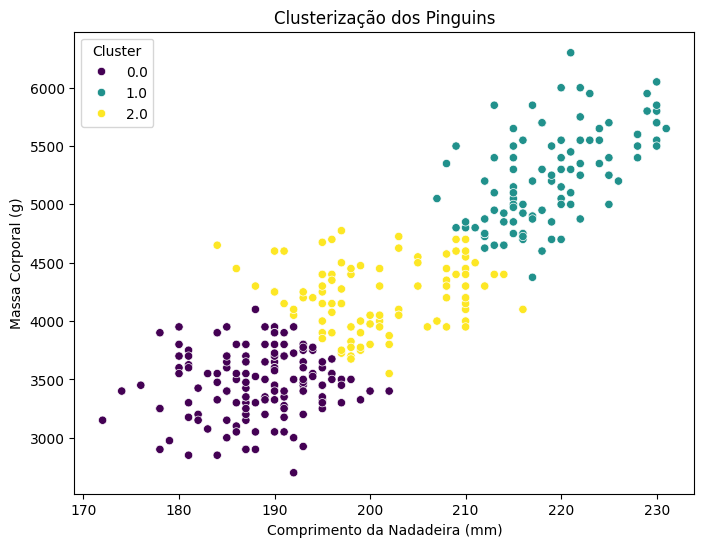

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["flipper_length_mm"], y=df["body_mass_g"], hue=df["cluster"], palette="viridis")
plt.title("Clusterização dos Pinguins")
plt.xlabel("Comprimento da Nadadeira (mm)")
plt.ylabel("Massa Corporal (g)")
plt.legend(title="Cluster")
plt.show()

# Conclusão

A pesquisa e a metodologia científica são fundamentais para garantir a validade dos estudos e análises realizadas. O uso de técnicas estatísticas e ferramentas como Python permite explorar dados, testar hipóteses e gerar insights confiáveis. Documentar e comunicar os resultados de forma clara é essencial para a disseminação do conhecimento e a tomada de decisões embasadas.